In [2]:
import pandas as pd
from newsapi import NewsApiClient
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta

# Inicialize a API do NewsAPI
newsapi = NewsApiClient(api_key='3be6fb74511c432bb6741415eb0419d7')

# Função para obter notícias
def get_stock_news(ticker, from_date, to_date, page_size=100, page=1):
    all_articles = newsapi.get_everything(q=ticker,
                                          from_param=from_date,
                                          to=to_date,
                                          language='pt',
                                          sort_by='relevancy',
                                          page_size=page_size,
                                          page=page)
    return all_articles['articles']

# Função para classificar o sentimento
def classify_sentiment(text, analyzer):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positivo'
    elif scores['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

if __name__ == "__main__":
    ticker = 'VIVT3'
    articles = []
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30)
    
    # Obtenha notícias dos últimos 30 dias
    for i in range(0, 30, 5):
        from_date = (start_date + timedelta(days=i)).strftime('%Y-%m-%d')
        to_date = (start_date + timedelta(days=i + 5)).strftime('%Y-%m-%d')
        for page in range(1, 2):
            articles.extend(get_stock_news(ticker, from_date, to_date, page_size=100, page=page))
    
    # Crie um DataFrame com as notícias
    df = pd.DataFrame(articles)
    
    # Inicialize o analisador de sentimentos
    analyzer = SentimentIntensityAnalyzer()
    
    # Classifique o sentimento das notícias
    df['sentiment'] = df['content'].apply(lambda x: classify_sentiment(x, analyzer) if x else 'neutro')
    
    # Exiba os resultados da análise de sentimentos
    print(df['sentiment'].value_counts())
    print(df[['title', 'sentiment']])

sentiment
neutro      20
negativo     6
Name: count, dtype: int64
                                                title sentiment
0   Telefônica Vivo (VIVT3) registra lucro 13% sup...    neutro
1   Vivo (VIVT3) convocará AGE para votar restitui...  negativo
2   Ações de dividendos para novembro: Vibra (VBBR...    neutro
3   Eleições nos EUA, balanço da Gerdau, nova reun...    neutro
4   Vivo, GPA, PRIO, RD, Vibra, Odontoprev, Marisa...    neutro
5   Ibovespa tem alta discreta de 0,11% à espera d...    neutro
6   Por que esta é a semana mais importante de 202...    neutro
7   Veja 4 ações para lucrar em uma economia bagun...    neutro
8   TIM (TIMS3): estratégia de preços mais agressi...  negativo
9   Vivo pode embolsar R$ 4,5 bi com transição reg...  negativo
10  TIM (TIMS3): estratégia de preços mais agressi...  negativo
11  JPMorgan vê planos da NuCel mais caros e reite...    neutro
12  TCU aprova acordo de solução consensual entre ...    neutro
13  Dividendos: Veja as 3 novas aposta

In [3]:
#Verifique valores distintos
df['sentiment'].unique()


array(['neutro', 'negativo'], dtype=object)

In [4]:
import pandas as pd
from newsapi import NewsApiClient
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from datetime import datetime, timedelta

# Inicialize a API do NewsAPI
newsapi = NewsApiClient(api_key='3be6fb74511c432bb6741415eb0419d7')

# Função para obter notícias
def get_stock_news(ticker, from_date, to_date, page_size=100, page=1):
    all_articles = newsapi.get_everything(q=ticker,
                                          from_param=from_date,
                                          to=to_date,
                                          language='en',
                                          sort_by='relevancy',
                                          page_size=page_size,
                                          page=page)
    return all_articles['articles']

# Inicialize o modelo FinBERT
model_name = "yiyanghkust/finbert-tone"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Função para classificar o sentimento usando FinBERT
def classify_sentiment(text):
    nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    result = nlp(text)
    return result[0]['label']

if __name__ == "__main__":
    ticker = 'AAPL'
    articles = []
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30)
    
    # Obtenha notícias dos últimos 30 dias
    for i in range(0, 30, 5):
        from_date = (start_date + timedelta(days=i)).strftime('%Y-%m-%d')
        to_date = (start_date + timedelta(days=i + 5)).strftime('%Y-%m-%d')
        for page in range(1, 2):
            articles.extend(get_stock_news(ticker, from_date, to_date, page_size=100, page=page))
    
    
    df = pd.DataFrame(articles)
    
    # Classifique o sentimento das notícias
    df['sentiment'] = df['description'].apply(lambda x: classify_sentiment(x) if x else 'neutro')
    
    # Exiba os resultados da análise de sentimentos
    print(df['sentiment'].value_counts())
    print(df[['title', 'sentiment']])

2024-12-04 20:26:29.655658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-04 20:26:33.282461: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


sentiment
Neutral     347
Positive     63
Negative     30
neutro        4
Name: count, dtype: int64
                                                 title sentiment
0    Market Clubhouse Morning Memo - November 5th, ...   Neutral
1    Nvidia and Google stock rise while Meta and TS...   Neutral
2    Warren Buffett's Berkshire Hathaway has enough...  Positive
3    Nvidia and Apple keep taking turns at the top ...  Positive
4    Warren Buffett’s Berkshire Hathaway is selling...  Positive
..                                                 ...       ...
439  Six of the World’s Richest People Who Are Not ...   Neutral
440  Apple (NASDAQ:AAPL) Reaches New 12-Month High ...   Neutral
441                                secfi added to PyPI   Neutral
442  Stonekeep Investments LLC Raises Holdings in A...   Neutral
443           Sunday Summary: No Rest for the Holidays   Neutral

[444 rows x 2 columns]


In [5]:
import pandas as pd
from newsapi import NewsApiClient
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from datetime import datetime, timedelta

# Inicialize a API do NewsAPI
newsapi = NewsApiClient(api_key='3be6fb74511c432bb6741415eb0419d7')

# Função para obter notícias
def get_stock_news(ticker, from_date, to_date, page_size=100, page=1):
    all_articles = newsapi.get_everything(q=ticker,
                                          from_param=from_date,
                                          to=to_date,
                                          language='en',
                                          sort_by='relevancy',
                                          page_size=page_size,
                                          page=page)
    return all_articles['articles']

# Inicialize o modelo FinBERT
model_name = "yiyanghkust/finbert-tone"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Função para classificar o sentimento usando FinBERT
def classify_sentiment(text):
    nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    result = nlp(text)
    return result[0]['label']

if __name__ == "__main__":
    ticker = 'AAPL'
    articles = []
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30)
    
    # Obtenha notícias dos últimos 30 dias
    for i in range(0, 30, 5):
        from_date = (start_date + timedelta(days=i)).strftime('%Y-%m-%d')
        to_date = (start_date + timedelta(days=i + 5)).strftime('%Y-%m-%d')
        for page in range(1, 2):
            articles.extend(get_stock_news(ticker, from_date, to_date, page_size=100, page=page))
    
    df = pd.DataFrame(articles)
    
    # Classifique o sentimento das notícias
    df['sentiment'] = df['description'].apply(lambda x: classify_sentiment(x) if x else 'neutro')
    
    # Converte a coluna 'publishedAt' para datetime e extrai a data
    df['date'] = pd.to_datetime(df['publishedAt']).dt.date
    
    # Exiba os resultados da análise de sentimentos
    print(df['sentiment'].value_counts())
    print(df[['title', 'sentiment']])

sentiment
Neutral     347
Positive     63
Negative     30
neutro        4
Name: count, dtype: int64
                                                 title sentiment
0    Market Clubhouse Morning Memo - November 5th, ...   Neutral
1    Nvidia and Google stock rise while Meta and TS...   Neutral
2    Warren Buffett's Berkshire Hathaway has enough...  Positive
3    Nvidia and Apple keep taking turns at the top ...  Positive
4    Warren Buffett’s Berkshire Hathaway is selling...  Positive
..                                                 ...       ...
439  Six of the World’s Richest People Who Are Not ...   Neutral
440  Apple (NASDAQ:AAPL) Reaches New 12-Month High ...   Neutral
441                                secfi added to PyPI   Neutral
442  Stonekeep Investments LLC Raises Holdings in A...   Neutral
443           Sunday Summary: No Rest for the Holidays   Neutral

[444 rows x 2 columns]


In [6]:
import yfinance as yf
from datetime import datetime, timedelta

# Obtenha dados históricos de preços das ações
def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    data.reset_index(inplace=True)  # Reseta o índice para garantir que 'Date' seja uma coluna
    data['date'] = data['Date'].dt.date  # Converte para datetime.date
    return data

ticker = 'AAPL'
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

# Obtenha dados históricos de preços das ações
stock_data = get_stock_data(ticker, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,2024-11-04 00:00:00-05:00,220.747138,222.545148,219.468546,221.766006,44944500,0.00,0.0,2024-11-04
1,2024-11-05 00:00:00-05:00,221.556241,223.703872,220.896963,223.204422,28111300,0.00,0.0,2024-11-05
2,2024-11-06 00:00:00-05:00,222.365355,225.821559,220.946918,222.475235,54561100,0.00,0.0,2024-11-06
3,2024-11-07 00:00:00-05:00,224.383137,227.629565,224.323205,227.229996,42137700,0.00,0.0,2024-11-07
4,2024-11-08 00:00:00-05:00,227.169998,228.660004,226.410004,226.960007,38328800,0.25,0.0,2024-11-08


In [7]:
# Converter a coluna 'date' para datetime.date no DataFrame de preços das ações
stock_data['date'] = pd.to_datetime(stock_data['date']).dt.date

# Converter a coluna 'date' para datetime.date no DataFrame das notícias
df['date'] = pd.to_datetime(df['date']).dt.date

# Verifique novamente as datas para garantir que estão no formato correto
print(stock_data['date'].head())
print(df['date'].head())

0    2024-11-04
1    2024-11-05
2    2024-11-06
3    2024-11-07
4    2024-11-08
Name: date, dtype: object
0    2024-11-05
1    2024-11-06
2    2024-11-05
3    2024-11-05
4    2024-11-04
Name: date, dtype: object


In [8]:
# Ordenar o DataFrame de preços das ações pela coluna 'date'
stock_data = stock_data.sort_values(by='date')

# Ordenar o DataFrame das notícias pela coluna 'date'
df = df.sort_values(by='date')

# Verifique as datas únicas em ambos os DataFrames
print(stock_data['date'].unique())
print(df['date'].unique())

[datetime.date(2024, 11, 4) datetime.date(2024, 11, 5)
 datetime.date(2024, 11, 6) datetime.date(2024, 11, 7)
 datetime.date(2024, 11, 8) datetime.date(2024, 11, 11)
 datetime.date(2024, 11, 12) datetime.date(2024, 11, 13)
 datetime.date(2024, 11, 14) datetime.date(2024, 11, 15)
 datetime.date(2024, 11, 18) datetime.date(2024, 11, 19)
 datetime.date(2024, 11, 20) datetime.date(2024, 11, 21)
 datetime.date(2024, 11, 22) datetime.date(2024, 11, 25)
 datetime.date(2024, 11, 26) datetime.date(2024, 11, 27)
 datetime.date(2024, 11, 29) datetime.date(2024, 12, 2)
 datetime.date(2024, 12, 3)]
[datetime.date(2024, 11, 4) datetime.date(2024, 11, 5)
 datetime.date(2024, 11, 6) datetime.date(2024, 11, 7)
 datetime.date(2024, 11, 8) datetime.date(2024, 11, 9)
 datetime.date(2024, 11, 10) datetime.date(2024, 11, 11)
 datetime.date(2024, 11, 12) datetime.date(2024, 11, 13)
 datetime.date(2024, 11, 14) datetime.date(2024, 11, 15)
 datetime.date(2024, 11, 16) datetime.date(2024, 11, 17)
 datetime.date

In [9]:
# Combine os dados de preços e sentimentos
combined_df = pd.merge(stock_data[['date', 'Close']], df[['date', 'sentiment']], on='date', how='left')

# Verifique se a coluna 'sentiment' foi preenchida corretamente
print(combined_df[['date', 'sentiment']].head(10))
print(combined_df['sentiment'].unique())

         date sentiment
0  2024-11-04  Positive
1  2024-11-04   Neutral
2  2024-11-04  Negative
3  2024-11-04   Neutral
4  2024-11-04   Neutral
5  2024-11-04   Neutral
6  2024-11-04   Neutral
7  2024-11-04   Neutral
8  2024-11-04   Neutral
9  2024-11-04   Neutral
['Positive' 'Neutral' 'Negative' 'neutro']


In [10]:
# Preencha valores nulos com 'neutro'
combined_df['sentiment'] = combined_df['sentiment'].fillna('neutro')

# Codifique os sentimentos como números
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1, 'neutro': 0}
combined_df['sentiment'] = combined_df['sentiment'].map(sentiment_mapping)

# Verifique se a coluna 'sentiment' foi preenchida e codificada corretamente
print(combined_df[['date', 'sentiment']].head(10))
print(combined_df['sentiment'].unique())

         date  sentiment
0  2024-11-04          1
1  2024-11-04          0
2  2024-11-04         -1
3  2024-11-04          0
4  2024-11-04          0
5  2024-11-04          0
6  2024-11-04          0
7  2024-11-04          0
8  2024-11-04          0
9  2024-11-04          0
[ 1  0 -1]


In [11]:
from sklearn.model_selection import train_test_split

# Prepare os dados para o modelo
X = combined_df[['sentiment']]
y = combined_df['Close']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()
X_test.head()

,sentiment
224,0
42,0
285,0
302,0
56,0


In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Ajustar hiperparâmetros do modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Exiba as previsões
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

Mean Squared Error: 40.553870600871356
         Actual   Predicted
224  228.520004  230.040527
42   222.475235  230.040527
285  234.929993  230.040527
302  237.330002  230.040527
56   226.960007  230.040527
..          ...         ...
199  228.279999  230.040527
334  239.589996  230.182388
93   225.119995  230.182388
198  228.279999  230.040527
197  228.279999  230.040527

[72 rows x 2 columns]


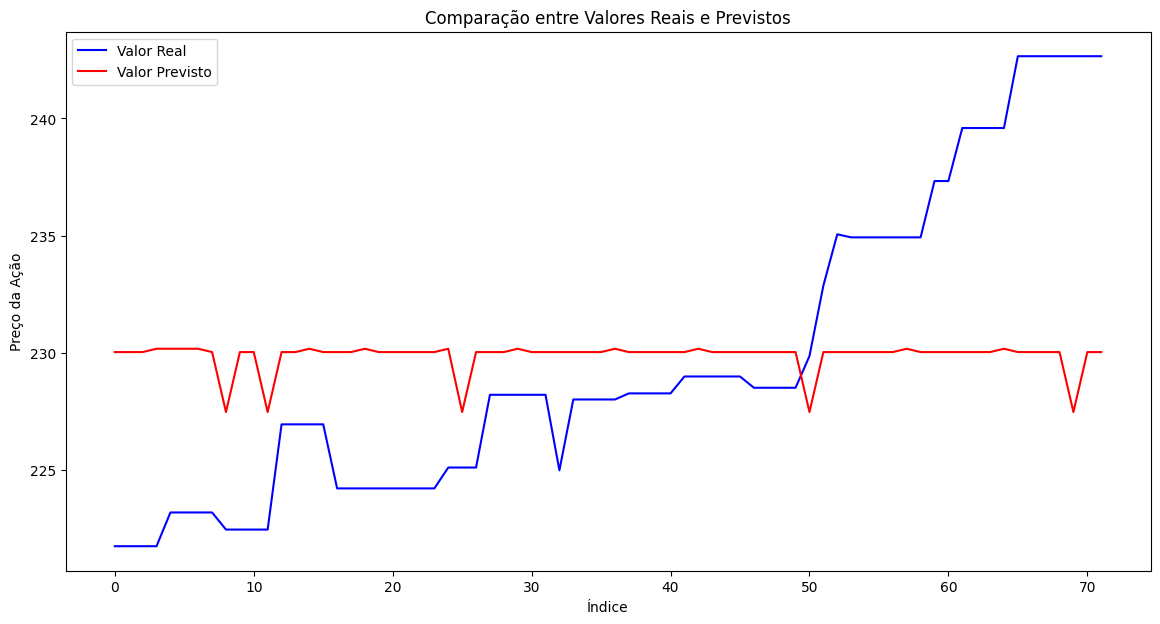

In [13]:
import matplotlib.pyplot as plt

# Crie um DataFrame com os valores reais e previstos
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Ordene o DataFrame pelo índice para garantir que os dados estejam na ordem correta
predictions_df = predictions_df.sort_index()

# Crie o gráfico
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Actual'].values, label='Valor Real', color='blue')
plt.plot(predictions_df['Predicted'].values, label='Valor Previsto', color='red')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Índice')
plt.ylabel('Preço da Ação')
plt.legend()
plt.show()